In [6]:
import numpy as np
import pandas as pd
from tabulate import tabulate
#1339 filas
df = pd.read_csv('../csvs/insurance.csv')
#.strip() coge todas las columnas en este caso de texto y le quita los espacios en blanco.
df.columns = df.columns.str.strip()
np.random.seed(42)
physical_activity_levels = np.array(["sedentary", "moderate", "active"])
df['physical_activity'] = np.random.choice(physical_activity_levels, size = len(df))

#Eliminamos la columna children dado que carece de relevancia real significativa a la hora de calcular un seguro médico personal.
df = df.drop("children", axis=1)

#Usaremos la columna expenses (gastos médicos en el último año), dividiéndolo en deciles para aplicarle un incremento dependiendo del decil correspondiente para usarlo como precio base
df['insurance_price'] = 8000

def ajustar_precio(fila):
    precio = fila['insurance_price']  
    if fila['age'] < 18:
        precio *= 0.85  # 15% de descuento (Menores de edad suelen tener menos riesgos)
    elif 18 <= fila['age'] < 25:
        precio *= 0.90  # 10% de descuento (Jóvenes suelen tener menos costos médicos)
    elif 25 <= fila['age'] < 35:
        precio *= 0.95  # 5% de descuento (Riesgo bajo pero mayor que adolescentes)
    elif 35 <= fila['age'] < 50:
        precio *= 1.00  # Sin cambios (Riesgo promedio)
    elif 50 <= fila['age'] < 60:
        precio *= 1.10  # 10% de incremento (Mayor probabilidad de enfermedades crónicas)
    elif 60 <= fila['age'] < 70:
        precio *= 1.20  # 20% de incremento (Edad avanzada con mayor uso de servicios médicos)
    elif 70 <= fila['age'] < 80:
        precio *= 1.30  # 30% de incremento (Mayor riesgo de hospitalización)
    elif fila['age'] >= 80:
        precio *= 1.50  # 50% de incremento (Riesgo muy alto de enfermedades graves)

    return precio

df['insurance_price'] = df.apply(ajustar_precio, axis=1)

correlacion = df['age'].corr(df['insurance_price'])
print("Correlación de las variables expenses y insurance_price:", correlacion)
print(tabulate(df, headers='keys', tablefmt='fancy_grid'))


Correlación de las variables expenses y insurance_price: 0.946515595582246
╒══════╤═══════╤════════╤═══════╤══════════╤═══════════╤════════════╤═════════════════════╤═══════════════════╕
│      │   age │ sex    │   bmi │ smoker   │ region    │   expenses │ physical_activity   │   insurance_price │
╞══════╪═══════╪════════╪═══════╪══════════╪═══════════╪════════════╪═════════════════════╪═══════════════════╡
│    0 │    19 │ female │  27.9 │ yes      │ southwest │   16884.9  │ active              │              7200 │
├──────┼───────┼────────┼───────┼──────────┼───────────┼────────────┼─────────────────────┼───────────────────┤
│    1 │    18 │ male   │  33.8 │ no       │ southeast │    1725.55 │ sedentary           │              7200 │
├──────┼───────┼────────┼───────┼──────────┼───────────┼────────────┼─────────────────────┼───────────────────┤
│    2 │    28 │ male   │  33   │ no       │ southeast │    4449.46 │ active              │              7600 │
├──────┼───────┼────────┼────

In [7]:
# División 80/20
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df['age'].values.reshape(-1,1)
y = df['insurance_price'].values

# Suponiendo que tenemos un DataFrame con X (variables) e y (target)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Datos de entrenamiento:", len(X_train))
print("Datos de prueba:", len(X_test))

# Crear modelo de regresión
modelo = LinearRegression()

# Ajustar el modelo a los datos de entrenamiento
modelo.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test)

# Evaluamos el modelo con métricas
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"Coeficiente de determinación (R²): {r2:.2f}")


Datos de entrenamiento: 1070
Datos de prueba: 268
Error cuadrático medio (MSE): 55126.62
Coeficiente de determinación (R²): 0.89


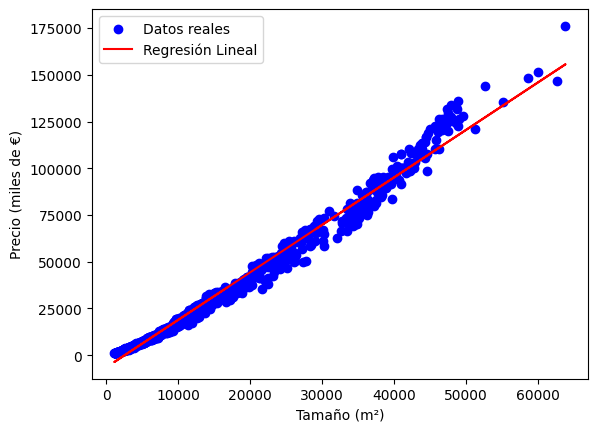

In [26]:
import matplotlib.pyplot as plt

plt.scatter(X, y, color="blue", label="Datos reales")
plt.plot(X, modelo.predict(X), color="red", label="Regresión Lineal")
plt.xlabel("Tamaño (m²)")
plt.ylabel("Precio (miles de €)")
plt.legend()
plt.show()